In [2]:
install.packages("mclogit")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [3]:
library(mclogit)

Loading required package: Matrix


#### link to using regular expressions to load files
https://stackoverflow.com/questions/47189714/reading-multiple-csv-files-from-a-folder-with-r-using-regex

### Workflow test on dummy data
    - Read in multiple files with different timescales
    - Perform mclogit
    - Create csv file with betas in the format below

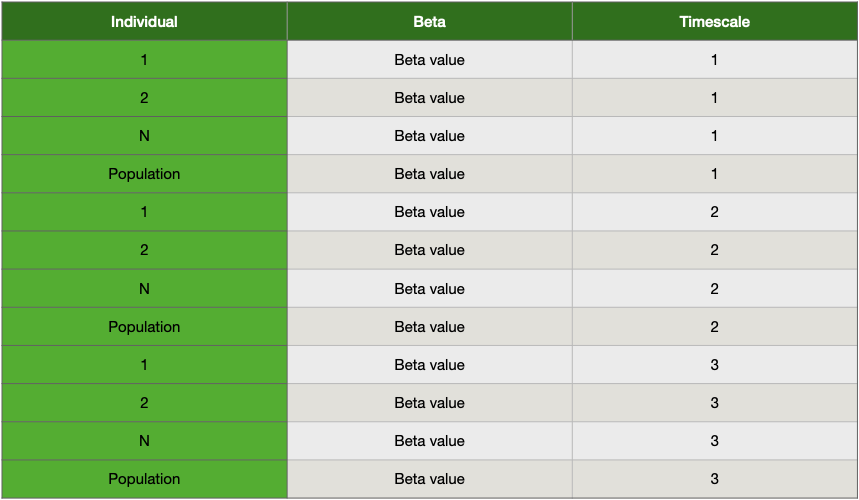

#### 1 - Load data from python

In [56]:
load <- function(time) {
    my_datal = list()
    for (t in seq_along(time)){
        my_files = list.files(pattern = paste('mfdf.*?t', toString(time[[t]]), '.csv', sep=''))
        my_filesl = lapply(my_files, read.csv)
        my_datal[[t]] = my_filesl
    }
    return(my_datal)
}

In [58]:
time = list(4)
my_datal = load(time)

In [59]:
my_files

[1] "mfdf_test_ind0df_t4.csv" "mfdf_test_ind1df_t4.csv"
[3] "mfdf_test_ind2df_t4.csv" "mfdf_test_ind3df_t4.csv"
[5] "mfdf_test_pop_t4.csv"

#### 2 - Perform conditional logistic regression

In [62]:
multiple_times = list()
output_dfs = list()

for (t in seq_along(my_datal)) {
    mclogit_output = list()
    for (i in seq_along(my_datal[[t]])) {
        clogit = coef(mclogit(cbind(my_datal[[t]][[i]]$label, my_datal[[t]][[i]]$frame) ~ feature0 + feature1, data=my_datal[[t]][[i]]))
        mclogit_output[[i]] = as.data.frame(clogit)
    }
    multiple_times[[t]] = mclogit_output
    t_df = cbind(multiple_times[[t]])
    output_dfs[[t]] = t_df   
}


Iteration 1 - Deviance = 17.47149
Iteration 2 - Deviance = 17.39196
Iteration 3 - Deviance = 17.39131
Iteration 4 - Deviance = 17.39131
converged

Iteration 1 - Deviance = 20.05095
Iteration 2 - Deviance = 20.04348
Iteration 3 - Deviance = 20.04348
Iteration 4 - Deviance = 20.04348
converged

Iteration 1 - Deviance = 19.80216
Iteration 2 - Deviance = 19.78016
Iteration 3 - Deviance = 19.78016
Iteration 4 - Deviance = 19.78016
converged

Iteration 1 - Deviance = 15.26865
Iteration 2 - Deviance = 14.94328
Iteration 3 - Deviance = 14.93312
Iteration 4 - Deviance = 14.93311
Iteration 5 - Deviance = 14.93311
converged

Iteration 1 - Deviance = 78.64466
Iteration 2 - Deviance = 78.58138
Iteration 3 - Deviance = 78.58136
Iteration 4 - Deviance = 78.58136
converged


#### 3 - Create csv file

In [48]:
output_df = do.call(rbind, output_dfs)
df = data.frame(matrix(unlist(output_df), nrow=length(output_df), byrow=T), stringsAsFactors=FALSE)
write.table(df, file='/Users/taylorcarter/Desktop/mfdf_test_output.csv', row.names=FALSE, col.names=list('beta1', 'beta2'), sep=",")

In [46]:
output_df

"-0.1683163, -0.2576266"
"-0.57280550, -0.02581237"
"-0.71163352, 0.06215971"
"-1.55722146, 0.01253735"
"-0.64130944, -0.03153729"


### Actual Data

#### Direction change feature

In [63]:
time = list(30, 60, 90, 1800)
my_datal = list()
for (t in seq_along(time)){
    my_files = list.files(pattern = paste('dc_positions0.*?df_t', toString(time[[t]]), '.csv', sep=''))
    my_files = my_files[order(nchar(my_files), my_files)]
    my_filesl = lapply(my_files, read.csv)
    my_datal[[t]] = my_filesl
}

In [64]:
my_files

[1] "dc_positions0_ind0df_t1800.csv"       
 [2] "dc_positions0_ind1df_t1800.csv"       
 [3] "dc_positions0_ind2df_t1800.csv"       
 [4] "dc_positions0_ind3df_t1800.csv"       
 [5] "dc_positions0_ind4df_t1800.csv"       
 [6] "dc_positions0_ind5df_t1800.csv"       
 [7] "dc_positions0_ind6df_t1800.csv"       
 [8] "dc_positions0_ind7df_t1800.csv"       
 [9] "dc_positions0_ind8df_t1800.csv"       
[10] "dc_positions0_ind9df_t1800.csv"       
[11] "dc_positions0_ind10df_t1800.csv"      
[12] "dc_positions0_ind11df_t1800.csv"      
[13] "dc_positions0_population_df_t1800.csv"

In [65]:
multiple_times = list()
output_dfs = list()

for (t in seq_along(my_datal)) {
    mclogit_output = list()
    for (i in seq_along(my_datal[[t]])) {
        print(t)
        print(i)
        clogit = coef(mclogit(cbind(my_datal[[t]][[i]]$label, my_datal[[t]][[i]]$frame) ~ feature, data=my_datal[[t]][[i]]))
        mclogit_output[[i]] = as.data.frame(clogit)
    }
    multiple_times[[t]] = mclogit_output
    t_df = cbind(multiple_times[[t]])
    output_dfs[[t]] = t_df   
}

[1] 1
[1] 1

Iteration 1 - Deviance = 2843.268
Iteration 2 - Deviance = 2840.956
Iteration 3 - Deviance = 2840.956
Iteration 4 - Deviance = 2840.956
converged
[1] 1
[1] 2

Iteration 1 - Deviance = 1003.585
Iteration 2 - Deviance = 1003.578
Iteration 3 - Deviance = 1003.578
converged
[1] 1
[1] 3

Iteration 1 - Deviance = 766.6397
Iteration 2 - Deviance = 766.6397
converged
[1] 1
[1] 4

Iteration 1 - Deviance = 2702.181
Iteration 2 - Deviance = 2699.735
Iteration 3 - Deviance = 2699.735
Iteration 4 - Deviance = 2699.735
converged
[1] 1
[1] 5

Iteration 1 - Deviance = 1006.199
Iteration 2 - Deviance = 1006.197
Iteration 3 - Deviance = 1006.197
converged
[1] 1
[1] 6

Iteration 1 - Deviance = 2522.374
Iteration 2 - Deviance = 2513.219
Iteration 3 - Deviance = 2513.209
Iteration 4 - Deviance = 2513.209
converged
[1] 1
[1] 7

Iteration 1 - Deviance = 561.0003
Iteration 2 - Deviance = 558.9908
Iteration 3 - Deviance = 558.9848
Iteration 4 - Deviance = 558.9848
converged
[1] 1
[1] 8

Iteration 

In [66]:
output_df = do.call(rbind, output_dfs)
df = data.frame(matrix(unlist(output_df), nrow=length(output_df), byrow=T), stringsAsFactors=FALSE)
write.table(df, file='/Users/taylorcarter/Desktop/dc_positions0_output.csv', row.names=FALSE, col.names='beta', sep=",")

#### Social density feature

In [77]:
time = list(30, 60, 90, 1800)
my_datal = list()
for (t in seq_along(time)){
    my_files = list.files(pattern = paste('sd_positions0.*?df_t', toString(time[[t]]), '.csv', sep=''))
    my_files = my_files[order(nchar(my_files), my_files)]
    my_filesl = lapply(my_files, read.csv)
    my_datal[[t]] = my_filesl
#     print(my_files)
}

In [75]:
my_files

[1] "sd_positions0_ind0df_t1800.csv"       
 [2] "sd_positions0_ind1df_t1800.csv"       
 [3] "sd_positions0_ind2df_t1800.csv"       
 [4] "sd_positions0_ind3df_t1800.csv"       
 [5] "sd_positions0_ind4df_t1800.csv"       
 [6] "sd_positions0_ind5df_t1800.csv"       
 [7] "sd_positions0_ind6df_t1800.csv"       
 [8] "sd_positions0_ind7df_t1800.csv"       
 [9] "sd_positions0_ind8df_t1800.csv"       
[10] "sd_positions0_ind9df_t1800.csv"       
[11] "sd_positions0_ind10df_t1800.csv"      
[12] "sd_positions0_ind11df_t1800.csv"      
[13] "sd_positions0_population_df_t1800.csv"

In [73]:
multiple_times = list()
output_dfs = list()

for (t in seq_along(my_datal)) {
    mclogit_output = list()
    for (i in seq_along(my_datal[[t]])) {
        print(t)
        print(i)
        clogit = coef(mclogit(cbind(my_datal[[t]][[i]]$label, my_datal[[t]][[i]]$frame) ~ feature, data=my_datal[[t]][[i]]))
        mclogit_output[[i]] = as.data.frame(clogit)
    }
    multiple_times[[t]] = mclogit_output
    t_df = cbind(multiple_times[[t]])
    output_dfs[[t]] = t_df   
}

[1] 1
[1] 1

Iteration 1 - Deviance = 2959.84
Iteration 2 - Deviance = 2959.834
Iteration 3 - Deviance = 2959.834
converged
[1] 1
[1] 2

Iteration 1 - Deviance = 2959.966
Iteration 2 - Deviance = 2959.963
Iteration 3 - Deviance = 2959.963
converged
[1] 1
[1] 3

Iteration 1 - Deviance = 2949.598
Iteration 2 - Deviance = 2949.429
Iteration 3 - Deviance = 2949.429
Iteration 4 - Deviance = 2949.429
converged
[1] 1
[1] 4

Iteration 1 - Deviance = 2954.526
Iteration 2 - Deviance = 2954.415
Iteration 3 - Deviance = 2954.415
converged
[1] 1
[1] 5

Iteration 1 - Deviance = 2959.98
Iteration 2 - Deviance = 2959.98
Iteration 3 - Deviance = 2959.98
converged
[1] 1
[1] 6

Iteration 1 - Deviance = 2953.868
Iteration 2 - Deviance = 2953.776
Iteration 3 - Deviance = 2953.776
converged
[1] 1
[1] 7

Iteration 1 - Deviance = 2958.724
Iteration 2 - Deviance = 2958.505
Iteration 3 - Deviance = 2958.505
converged
[1] 1
[1] 8

Iteration 1 - Deviance = 2959.394
Iteration 2 - Deviance = 2959.365
Iteration 3 - 

Warning message in mclogit(cbind(my_datal[[t]][[i]]$label, my_datal[[t]][[i]]$frame) ~ :
“removing feature from model due to insufficient within-choice set variance”

ERROR: Error in mclogit(cbind(my_datal[[t]][[i]]$label, my_datal[[t]][[i]]$frame) ~ : No predictor variable remains in model


In [70]:
output_df = do.call(rbind, output_dfs)
df = data.frame(matrix(unlist(output_df), nrow=length(output_df), byrow=T), stringsAsFactors=FALSE)
write.table(df, file='/Users/taylorcarter/Desktop/sd_positions0_output.csv', row.names=FALSE, col.names='beta', sep=",")